**Zahrotul Nailul Izah**

**0519140128**

**Perundangan K3**

**RPL D4 K3 PPNS**

Menurut keputusan Menteri Ketenagakerjaan Republik Indonesia No.365 Tahun 2020 Tentang Petunjuk Pelaksanaan Bulan Keselamatan dan Kesehatan Kerja Nasional Tahun 2021 telah memutuskan bahwa diadakannya pelaksanaan Bulan K3 Tahun 2021 dimulai pada tanggal 12 Januari 2021 sampai dengan 12 Februari 2021 dan dilaksanakan secara terus menerus dan berkesinambungan. Sehingga, tujuan diadakannya hal tersebut salah satunya adalah untuk meningkatkan penerapan K3 pada pola dan bentuk pekerjaan baru yang timbul akibat era ekonomi digitalisasi. Pada era ekonomi digitalisasi saat ini sedang bergerak maju menghadapi tantangan pada Era Revolusi Industri 4.0 yang menerapkan metode digital seperti inovasi pada otomatisasi, super computer, robot, fleksibilitas pola kerja, modifikasi genetic, dan artificial intelligence. 

Pada dewasa ini, perkembangan dibidang teknologi sangatlah pesat apalagi pada era digitalisasi saat ini. Penggunaan Artificial Intelligence menjadi topik hangat yang diperbincangkan dan digunakan saat ini. Banyak faktor yang menunjang sisi positif dan kemudahan dalam penerapan menggunakan metode tersebut. Oleh karena itu, dalam rangka memperingati bulan K3 berdasarkan keputusan Menteri maka saya mengikuti kegiatan tersebut dengan cara mempromosikan pentingnya penerapan K3 dalam kehidupan sehari-hari dengan cara memprediksi keterikatan kerugian materi akibat jumlah kecelakaan yang ditumbulkan dengan menggunakan algoritma Machine Learning yang merupakan bagian dari Artificial Intelligence yang hasil akhirnya akan saya post pada instagram dan github. 

Saya menggunakan dataset yang ada pada Badan Pusat Statisika (https://www.bps.go.id/linkTableDinamis/view/id/1134). Dengan menggunakan dataset tersebut saya ingin memprediksi keterikatan kerugian materi yang ditimbulkan akibat jumlah kecelakaan yang terjadi dengan menggunakan metode algoritma dasar khusus prediction of Machine Learning yaitu Linear Regression. 

Linear Regression merupakan Metode Statistik yang berfungsi untuk menguji sejauh mana hubungan sebab akibat antara Variabel Faktor Penyebab (X) terhadap Variabel Akibatnya (Y). Rumus model algoritma ini adalah:
Y = a + bX
Dimana :
Y = Variabel Response atau Variabel Akibat (Dependent)
X = Variabel Predictor atau Variabel Faktor Penyebab (Independent)
a = konstanta
b = koefisien regresi (kemiringan); besaran Response yang ditimbulkan oleh Predictor.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

Berikut menampilkan dataset yang digunakan yaitu berupa tahun kejadian, jumlah kecelakaan, korban mati, korban yang mengalami luka berat dan ringan, dan kerugian materi yang ditimbulkan akibat kecelakaan.

## Preprocessing
Pada proses ini disebut preprocessing data dimana dataset dipersiapkan dan dianalisis sehingga data yang dibuthkan saja yang digunakan agar model yang dibuat sesuai dengan yang diinginkan.

satuan dalam dataset yang digunakan yaitu per orang dan nilai Kerugian_materi dalam jutaan

In [273]:
accident1 = 'accident1.csv'
daft = pd.read_csv(accident1)
daft.head(10)

,Tahun,Jumlah_kecelakaan,Korban_mati,Luka_berat,Luka_ringan,Kerugian_materi
0,1992,19920,9819,13363,14846,15077
1,1993,17323,10038,11453,13037,14714
2,1994,17469,11004,11055,12215,16544
3,1995,16510,10990,9952,11873,17745
4,1996,15291,10869,8968,10374,18411
5,1997,17101,12308,9913,12699,20848
6,1998,14858,11694,8878,10609,26941
7,1999,12675,9917,7329,9385,32755
8,2000,12649,9536,7100,9518,36281
9,2001,12791,9522,6656,9181,37617


In [274]:
daft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
Tahun                27 non-null int64
Jumlah_kecelakaan    27 non-null int64
Korban_mati          27 non-null int64
Luka_berat           27 non-null int64
Luka_ringan          27 non-null int64
Kerugian_materi      27 non-null int64
dtypes: int64(6)
memory usage: 1.3 KB


In [275]:
daft.describe()

,Tahun,Jumlah_kecelakaan,Korban_mati,Luka_berat,Luka_ringan,Kerugian_materi
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2005.000000,53921.074074,17612.814815,17738.259259,52379.296296,108781.555556
std,7.937254,40831.650955,8246.611743,10437.784747,46736.145959,94191.705326
min,1992.000000,12267.000000,8762.000000,6012.000000,8694.000000,14714.000000
25%,1998.500000,15900.500000,10453.500000,8975.500000,11241.000000,29848.000000
50%,2005.000000,49553.000000,15762.000000,13363.000000,46827.000000,53044.000000
75%,2011.500000,96069.500000,25345.500000,24832.500000,108344.000000,214879.000000
max,2018.000000,117949.000000,31262.000000,39704.000000,130571.000000,298627.000000


In [276]:
daft.isnull().sum()

Tahun                0
Jumlah_kecelakaan    0
Korban_mati          0
Luka_berat           0
Luka_ringan          0
Kerugian_materi      0
dtype: int64

In [277]:
df = daft.drop(['Tahun'], axis = 1)
df.head()

,Jumlah_kecelakaan,Korban_mati,Luka_berat,Luka_ringan,Kerugian_materi
0,19920,9819,13363,14846,15077
1,17323,10038,11453,13037,14714
2,17469,11004,11055,12215,16544
3,16510,10990,9952,11873,17745
4,15291,10869,8968,10374,18411


In [278]:
print(df.dtypes)

Jumlah_kecelakaan    int64
Korban_mati          int64
Luka_berat           int64
Luka_ringan          int64
Kerugian_materi      int64
dtype: object


In [279]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1:2].values

df.head()

,Jumlah_kecelakaan,Korban_mati,Luka_berat,Luka_ringan,Kerugian_materi
0,19920,9819,13363,14846,15077
1,17323,10038,11453,13037,14714
2,17469,11004,11055,12215,16544
3,16510,10990,9952,11873,17745
4,15291,10869,8968,10374,18411


In [280]:
df.tail()

,Jumlah_kecelakaan,Korban_mati,Luka_berat,Luka_ringan,Kerugian_materi
22,95906,28297,26840,109741,250021
23,96233,24275,22454,107743,215892
24,106644,31262,20075,120532,229137
25,104327,30694,14559,121575,217031
26,109215,29472,13315,130571,213866


Pada proses dibawah ini adalah dimana data dilihat menggunakan grafik. Dari grafik yang dihasilkan grafik akan menunjukkan bagaimana data tersebut bersinambungan dimana dalam hal ini dapat ditentukan algoritma apa yang dapat digunakan. Dari grafik yang dihasilkan, algoritma yang dapat digunakan yaitu menggukana Linear Reggression dimana dianalisis keterikatan hubungan X dengan Y. 

C:\Users\ACER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


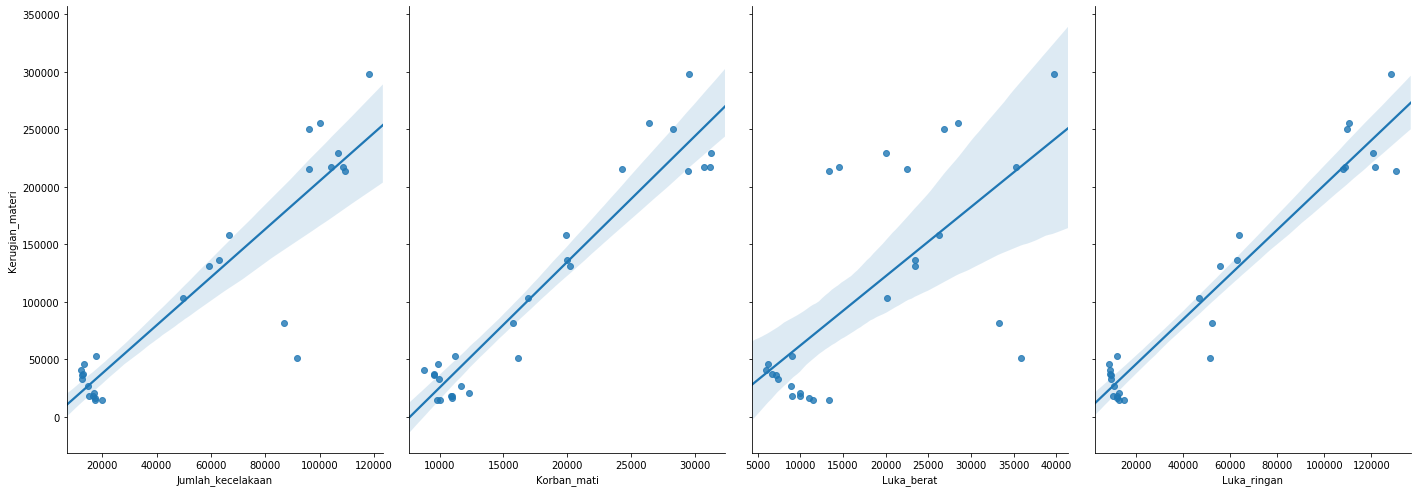

In [281]:
sns.pairplot(df, x_vars=['Jumlah_kecelakaan','Korban_mati', 'Luka_berat', 'Luka_ringan'], y_vars='Kerugian_materi', size=7, aspect= 0.7, kind= 'reg')

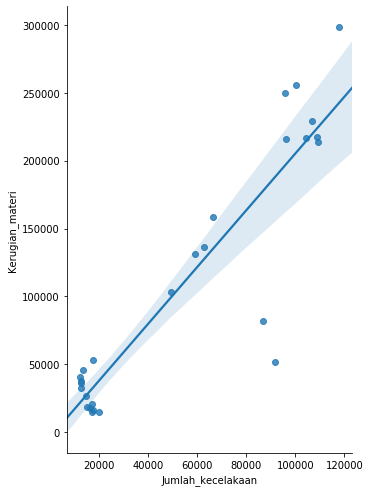

In [282]:
sns.pairplot(df, x_vars=['Jumlah_kecelakaan'], y_vars='Kerugian_materi', size=7, aspect= 0.7, kind= 'reg')

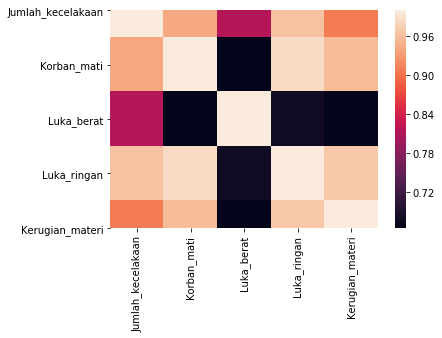

In [283]:
sns.heatmap(df.corr())

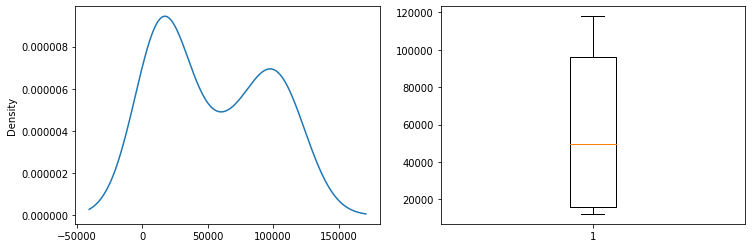

In [284]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Jumlah_kecelakaan'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Jumlah_kecelakaan'])
plt.show()

- Dapat dilihat bahwa mean dan median dari Jumlah_kecelakaan terpusat di sekitar nilai 0-50000.

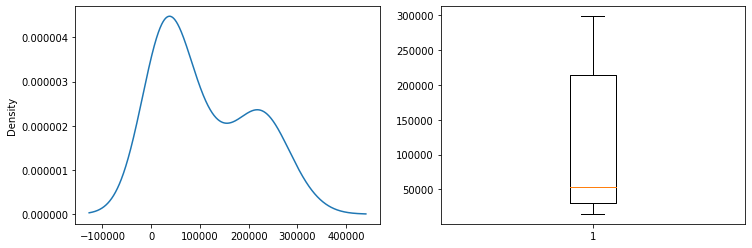

In [285]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Kerugian_materi'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Kerugian_materi'])
plt.show()

- Dapat dilihat bahwa mean dan median dari Jumlah_kecelakaan terpusat di sekitar nilai 0-100000.

- persebaran data kurang merata (memiliki standard deviasi yang lebih tinggi ) dibandingkan dengan data Jumlah_kecelakaan karena memiliki whiskers boxplot yang panjang.

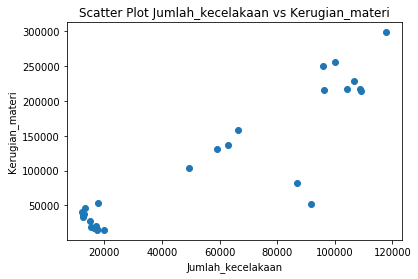

In [286]:
plt.scatter(df['Jumlah_kecelakaan'], df['Kerugian_materi'])
plt.xlabel('Jumlah_kecelakaan')
plt.ylabel('Kerugian_materi')
plt.title('Scatter Plot Jumlah_kecelakaan vs Kerugian_materi')
plt.show()

- Dari scatter plot dapat dilihat bahwa data memiliki korelasi positif yang cukup signifikan.
- Hal ini berarti dengan bertambahnya nilai dari Jumlah_kecelakaan maka nilai Kerugian_materi pun akan bertambah.

In [287]:
df.corr()

,Jumlah_kecelakaan,Korban_mati,Luka_berat,Luka_ringan,Kerugian_materi
Jumlah_kecelakaan,1.000000,0.941714,0.814375,0.963484,0.907106
Korban_mati,0.941714,1.000000,0.664430,0.984766,0.957860
Luka_berat,0.814375,0.664430,1.000000,0.677751,0.666734
Luka_ringan,0.963484,0.984766,0.677751,1.000000,0.967833
Kerugian_materi,0.907106,0.957860,0.666734,0.967833,1.000000


Berdasarkan data diatas dapat menentukan nilai korelasi keduannya dimana nilai korelasinya adalah 0,90 yang termasuk kategori sangat tinggi.

## Processing
Pada proses dibawah ini merupakan processing  dimana dapat diolah agar dapat dianalisis. Module train_test_split digunakan untuk membagi data kita menjadi training dan testing set. Pada pembagian data pada umumnya menggunakan presentasi 80% data untuk training data dan 20% data untuk test data. 

In [297]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Pada proses kali ini, saya menggunakan 3 cara yaitu:

- menggunakan semua data (algoritma yang menentukan mana yang termasuk X dan Y)
- menggunakan semua data kecuali Kerugian_materi untuk X dan dan Kerugian_materi untuk Y
- menggunakan data Jumlah_kecelakaan untuk X dan Kerugian_materi untuk Y

dalam hal ini, akan dianalasis mana yang memiliki nilai akurasi yang tinggi dengan parameter yang dibutuhkan dalam analisis data

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [299]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- regr.intercept_ digunakan untuk mencari intercept (b).
- regr.coef_ digunakan untuk mencari nilai slope/koefisien (m) 

In [300]:
print(regr.intercept_)

[-3.63797881e-12]


In [301]:
print(regr.coef_)

[[3.00636602e-16 1.00000000e+00 1.38777878e-16 1.11022302e-16]]


In [302]:
y_pred = regr.predict(X_test)
print(y_pred)

[[11004.]
 [31262.]
 [15762.]
 [19979.]
 [12308.]
 [ 9856.]
 [24275.]
 [16115.]
 [31195.]]


In [303]:
regr.score(X_test, y_test)

1.0

Berdasarkan perhitungan yang didapatkan jika menggunakan semua data (algoritma yang menentukan mana yang termasuk X dan Y) memperoleh nilai akurasi sebesar 100% yang berarti itu sangat baik, namun tidaklah sesuai dengan parameter yang dibutuhkan sehingga tidak dapat digunakan untuk menentukan nilai prediksi yang akan digunakan

Berikut merupakan code yang digunakan untuk mengecek apakah nilai akurasi sudah sesuai apa tidak.

In [306]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0

Pada pengujian kedua menggunakan semua data kecuali Kerugian_materi untuk X dan dan Kerugian_materi untuk Y

In [307]:
X1 = df.drop(['Kerugian_materi'], axis=1)
y1 = df['Kerugian_materi']

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=1/3, random_state=0)

In [309]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [310]:
print(regr.intercept_)

-17917.296613152663


In [311]:
print(regr.coef_)

[-2.52476042  1.68260127  3.70736078  3.24796401]


In [312]:
y_pred1 = regr.predict(X_test)
print(y_pred1)

[ 37151.76182413 231342.49995519  82188.5918611  148162.39133613
  37613.19427746  15845.56566089 213153.04519568  77608.35391555
 244803.75581191]


In [313]:
regr.score(X_test, y_test)

0.9491394384184006

In [314]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.9491394384184006

Pada perhitungan diatas didapatkan nilai akurasi 94,9% dimana termasuk bagus namun tidak sesuai dengan parameter yang dicari.

Pada perhitungan ketiga menggunakan data Jumlah_kecelakaan untuk X dan Kerugian_materi untuk Y

In [245]:
X2 = df.drop(['Korban_mati', 'Luka_berat', 'Luka_ringan','Kerugian_materi'], axis=1)
y2 = df['Kerugian_materi']

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=1/3, random_state=0)

In [247]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [248]:
print(regr.intercept_)

-6920.409735333611


In [249]:
print(regr.coef_)

[2.39416043]


In [250]:
y_pred2 = regr.predict(X_test)
print(y_pred2)

[ 34903.17873182 248402.43464562 201419.43046225 143815.93063285
  34022.12769536  25158.94580141 223476.83045926 212439.75089927
 253315.25183805]


In [251]:
regr.score(X_test, y_test)

0.3146838713713047

In [252]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)

0.3146838713713047

Pada perhitungan diatas didapatkan nilai akurasi sebesar 31,4% dimana menunjukkan nilai yang rendah dibandingkan kedua cara yang diatas, namun sesuai dengan parameter yang dicari dimana perhitungan menunjukkan nilai korelasi Jumlah_kecelakaan dengan Kerugian_materi yang dihasilkan.

Untuk jelas dapat diperhatikan grafik dibawah ini. Grafik dibawah ini menunjukkan data yang dilatih (dengan titik warna merah) dengan garis linear. Grafik tidak jauh berbeda dengan grafik diatas karena grafik dibawah ini meruapakan data yang dalam hal untuk dilatih

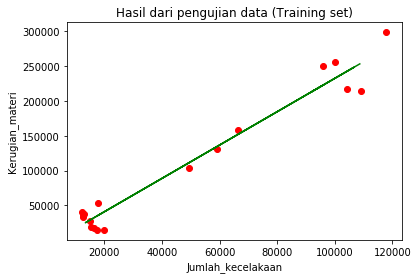

In [253]:
plt.scatter(X_train, y_train , color = "red")
plt.plot(X_test, y_pred2, color = "green")
plt.title("Hasil dari pengujian data (Training set)")
plt.xlabel("Jumlah_kecelakaan")
plt.ylabel("Kerugian_materi")
plt.show()

Garis hijau merupakan Regression Line dari model yang telah dibuat sebelumnya.

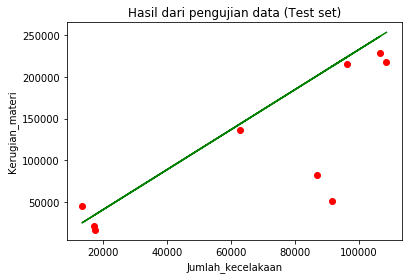

In [254]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, y_pred2, color = "green")
plt.title("Hasil dari pengujian data (Test set)")
plt.xlabel("Jumlah_kecelakaan")
plt.ylabel("Kerugian_materi")
plt.show()

Berikut merupakan prediksi Kerugian_materi yang dihasilkan jika Jumlah_kecelakaan sebesar 15.000

In [255]:
regr.predict([[15000]])

array([28991.99664209])

Berikut merupakan prediksi Kerugian_materi yang dihasilkan jika Jumlah_kecelakaan sebesar 100.000

In [256]:
regr.predict([[100000]])

array([232495.63278085])

Berdasarkan hasil nilai diatas dapat diketahui jika nilai prediksi yang dihasilkan tidak sesuai dengan yang diinginkan karena harnya memiliki nilai akurasi sebesar 31,4% dimana nilai tersebut termasuk kedalam rendah karena hanya menggunakan parameter X(Jumlah_Kecelakaan) dan Y(Kerugian_materi). Jika menggunakan multiple linear regression hasil yang didapatkan sebesar 94,9% karena menggunakan parameter input X yang banyak sehingga dapat dijadikan tolak ukur nilai Y(Kerugian_materi). Sehingga dalam menentukan nilai prediksi pada kasus ini menggunakan metode algoritma Mutiple Linear Regression lebih baik dibandingkan dengan simple linear regression. 

Pada akhirnya nanti diketahui seberapa besar akurasi metode yang digunakan dalam memprediksi kerugian materi yang dihasilkan dengan nilai jumlah kecelakaan yang diberikan. Berdasarkan hasil yang ditunjukkan seharusnya jika jumlah kecelakaan semakin besar maka jumlah kerugian yang ditimbulkan semakin besar karena setiap adanya kecelakaan maka akan menimbulkan kerugian materi. Sehingga dari hal tersebut kita juga dapat mengendalikan resiko kecelakaan setiap tahun dengan menganalisa tingkat kecelakaan per tahunnya dan hal tersebut juga dapat dijadikan parameter keberhasilan penerapan K3 jika jumlah kecelakaan menurun setiap tahunnya. Dengan adanya prediksi dapat memberikan kemudahan dan tolak ukur untuk mencapai target yang diinginkan. 